# Getting Started

First we'll import the local masks package and other needed packages.

In [1]:
import masks
import os
import c_swain_python_utils as csutils

## Converting a Binary Image

First we'll specify the path to a text image that we want to convert to an image file.

In [2]:
file_name = 'test_2d_smile.tif'
data_dir = os.path.join('data', 'examples')
file_path = os.path.join(data_dir, file_name)

We'll then create a `Mask` object from the image file.

In [3]:
mask = masks.Mask.from_image(file_path)

Loaded image has shape: 

(512, 512)


We'll then convert the `Mask` object to an importable photo-activation mask (PAM) text file containg commands to define the mask within PrairieView.

By default the command files will be written into a directory next to the imported image named `{image_filename}_mask_commands`.

Creating photoactivation mask file(s) for import into Prairie View.
Optimizing file size by testing different chunking methods.
METHOD 1 of 2: do_invert=False, dim_priority="x"
Chunking mask file into rectangular regions ...
> Analyzing mask at z-slice   1 of   1
> > Analyzing mask at row    100
> > Analyzing mask at row    200
> > Analyzing mask at row    300
> > Analyzing mask at row    400
> > Analyzing mask at row    500
Done chunking.
Mask decomposed into 762 chunks.


METHOD 2 of 2: do_invert=False, dim_priority="y"
Chunking mask file into rectangular regions ...
> Analyzing mask at z-slice   1 of   1
> > Analyzing mask at column    100
> > Analyzing mask at column    200
> > Analyzing mask at column    300
> > Analyzing mask at column    400
> > Analyzing mask at column    500
Done chunking.
Mask decomposed into 760 chunks.


BEST SIZE found to be 760 chunks with method # 2.
Will save mask file(s) in directory "data\examples\test_2d_smile.tif_mask_outputs".

Auto-set `label_to_i

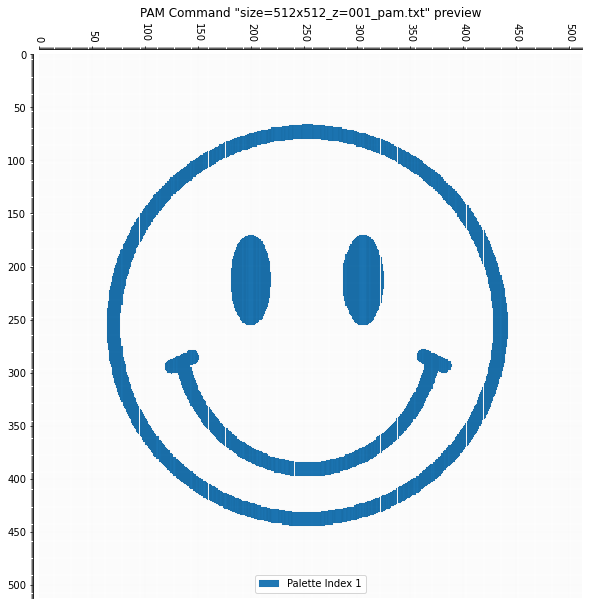

Copying PAM files to subfolder to prepare for sequential z-stack import.


In [4]:
mask.write_command_files()

The output is previewed in the figure above. 

We can also look directly at the text file contents (which is a series of labeled polygon definitions, interperatable by PrairieView).

In [5]:
output_path = os.path.join(file_path + '_' + masks.Mask.save_dir_tag, 'size=512x512_z=001_pam.txt')
with open(output_path, 'r') as f:
    contents = f.readlines()
    
print(f'Command File "{output_path:s}" Contents:')
print(contents[0][:80] + ' ...')

Command File "data\examples\test_2d_smile.tif_mask_outputs\size=512x512_z=001_pam.txt" Contents:
0.12502,0.46682,0.12693,0.46682,0.12693,0.53123,0.12502,0.53123,-1,0.12697,0.453 ...


## Non-Binary Images

Let's try again with a file having multiple image levels

Loaded image has shape: 

(200, 200)
Creating photoactivation mask file(s) for import into Prairie View.
Optimizing file size by testing different chunking methods.
METHOD 1 of 2: do_invert=False, dim_priority="x"
Chunking mask file into rectangular regions ...
> Analyzing mask at z-slice   1 of   1
> > Analyzing mask at row    100
> > Analyzing mask at row    200
Done chunking.
Mask decomposed into 744 chunks.


METHOD 2 of 2: do_invert=False, dim_priority="y"
Chunking mask file into rectangular regions ...
> Analyzing mask at z-slice   1 of   1
> > Analyzing mask at column    100
> > Analyzing mask at column    200
Done chunking.
Mask decomposed into 744 chunks.


BEST SIZE found to be 744 chunks with method # 1.
Will save mask file(s) in directory "data\examples\test_2d.tif_mask_outputs".

Auto-set `label_to_id` dict based on values of entire mask.
Writing file with conversion factors between palette indices and laser powers.
Wrote lookup table to "data\examples\test_2d.tif_mask_out

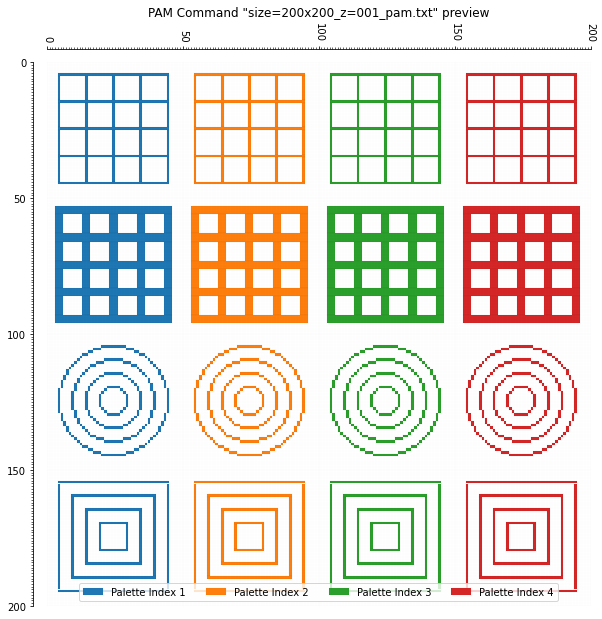

Copying PAM files to subfolder to prepare for sequential z-stack import.


In [6]:
file_name = 'test_2d.tif'
file_path = os.path.join(data_dir, file_name)
mask = masks.Mask.from_image(file_path)
mask.write_command_files()

We can use the `split_values` flag passed by the `pam_command_kwargs` argument in the `write_command_files` method to generate different command files for each mask value.

Creating photoactivation mask file(s) for import into Prairie View.
Optimizing file size by testing different chunking methods.
METHOD 1 of 2: do_invert=False, dim_priority="x"
Chunking mask file into rectangular regions ...
> Analyzing mask at z-slice   1 of   1
> > Analyzing mask at row    100
> > Analyzing mask at row    200
Done chunking.
Mask decomposed into 744 chunks.


METHOD 2 of 2: do_invert=False, dim_priority="y"
Chunking mask file into rectangular regions ...
> Analyzing mask at z-slice   1 of   1
> > Analyzing mask at column    100
> > Analyzing mask at column    200
Done chunking.
Mask decomposed into 744 chunks.


BEST SIZE found to be 744 chunks with method # 1.
Will save mask file(s) in directory "data\examples\test_2d.tif_mask_outputs".

Auto-set `label_to_id` dict based on values of entire mask.
Writing file with conversion factors between palette indices and laser powers.
Wrote lookup table to "data\examples\test_2d.tif_mask_outputs\palette-power_conversion_table.t

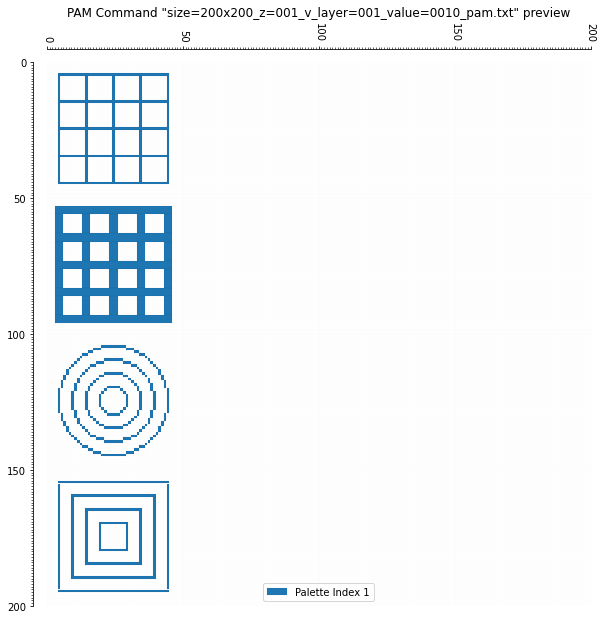

data\examples\test_2d.tif_mask_outputs\size=200x200_z=001_v_layer=002_value=0020_pam.txt

Attempting to preview command file "data\examples\test_2d.tif_mask_outputs\size=200x200_z=001_v_layer=002_value=0020_pam.txt"
Chunk     62 : (array([[ 87.01, 109.01],
       [ 87.99, 109.01],
       [ 87.99, 109.99],
       [ 87.01, 109.99]]), 2)
Chunk    124 : (array([[ 72.01, 129.01],
       [ 76.99, 129.01],
       [ 76.99, 129.99],
       [ 72.01, 129.99]]), 2)
Chunk    186 : (array([[ 54.01, 194.01],
       [ 94.99, 194.01],
       [ 94.99, 194.99],
       [ 54.01, 194.99]]), 2)
Creating Figure
Saving Figure
Displaying preview figure in notebook output:


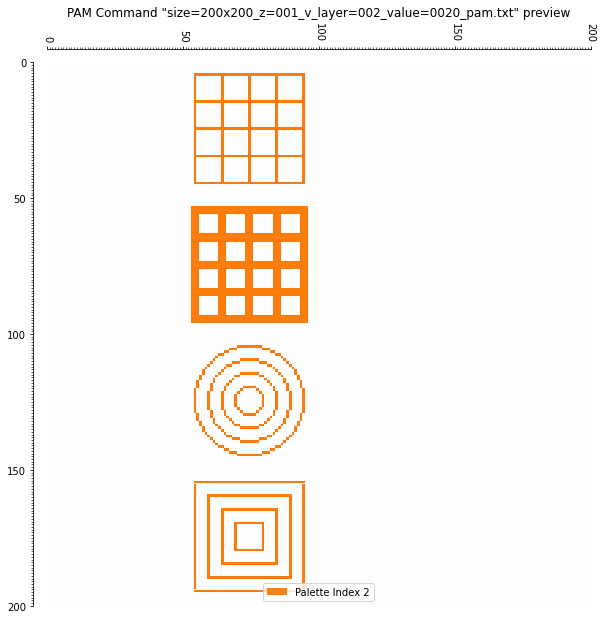

data\examples\test_2d.tif_mask_outputs\size=200x200_z=001_v_layer=003_value=0030_pam.txt

Attempting to preview command file "data\examples\test_2d.tif_mask_outputs\size=200x200_z=001_v_layer=003_value=0030_pam.txt"
Chunk     62 : (array([[137.01, 109.01],
       [137.99, 109.01],
       [137.99, 109.99],
       [137.01, 109.99]]), 3)
Chunk    124 : (array([[122.01, 129.01],
       [126.99, 129.01],
       [126.99, 129.99],
       [122.01, 129.99]]), 3)
Chunk    186 : (array([[104.01, 194.01],
       [144.99, 194.01],
       [144.99, 194.99],
       [104.01, 194.99]]), 3)
Creating Figure
Saving Figure
Displaying preview figure in notebook output:


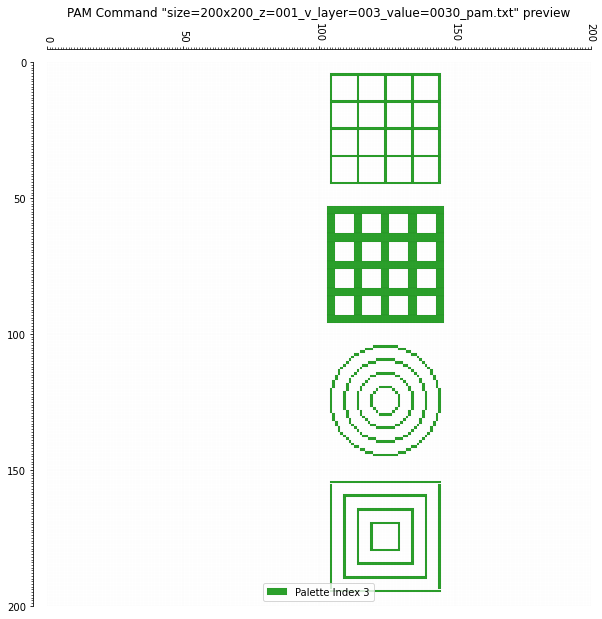

data\examples\test_2d.tif_mask_outputs\size=200x200_z=001_v_layer=004_value=0040_pam.txt

Attempting to preview command file "data\examples\test_2d.tif_mask_outputs\size=200x200_z=001_v_layer=004_value=0040_pam.txt"
Chunk     62 : (array([[187.01, 109.01],
       [187.99, 109.01],
       [187.99, 109.99],
       [187.01, 109.99]]), 4)
Chunk    124 : (array([[172.01, 129.01],
       [176.99, 129.01],
       [176.99, 129.99],
       [172.01, 129.99]]), 4)
Chunk    186 : (array([[154.01, 194.01],
       [194.99, 194.01],
       [194.99, 194.99],
       [154.01, 194.99]]), 4)
Creating Figure
Saving Figure
Displaying preview figure in notebook output:


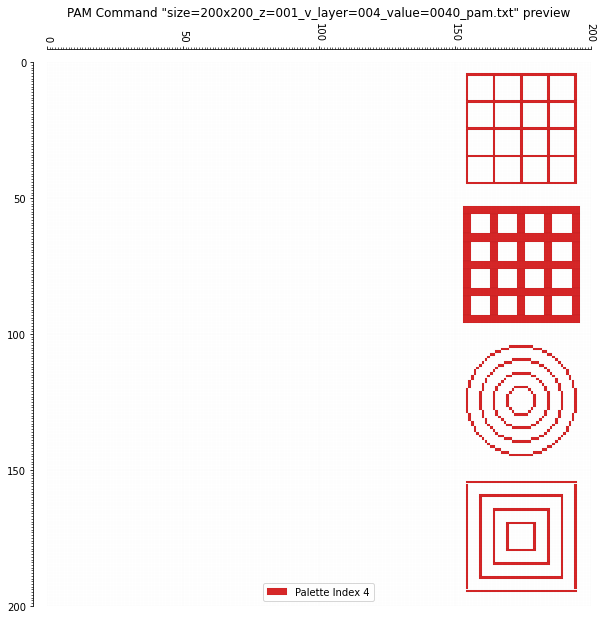

In [7]:
mask.write_command_files(pam_command_kwargs=dict(split_values=True))

## 3D Images

We can also process a 3D tiff stack into a seriese of masks. Notice that the mask output for the second slice is split into multiple files to keep each command text file under the limit of 0.25 MB. These split files are saved in a subfolder tagged 'SPLIT' with the file information.

Loaded image has shape: 

(5, 512, 512)
Creating photoactivation mask file(s) for import into Prairie View.
Optimizing file size by testing different chunking methods.
METHOD 1 of 2: do_invert=False, dim_priority="x"
Chunking mask file into rectangular regions ...
> Analyzing mask at z-slice   1 of   5
> > Analyzing mask at row    100
> > Analyzing mask at row    200
> > Analyzing mask at row    300
> > Analyzing mask at row    400
> > Analyzing mask at row    500
> Analyzing mask at z-slice   2 of   5
> > Analyzing mask at row    100
> > Analyzing mask at row    200
> > Analyzing mask at row    300
> > Analyzing mask at row    400
> > Analyzing mask at row    500
> Analyzing mask at z-slice   3 of   5
> > Analyzing mask at row    100
> > Analyzing mask at row    200
> > Analyzing mask at row    300
> > Analyzing mask at row    400
> > Analyzing mask at row    500
> Analyzing mask at z-slice   4 of   5
> > Analyzing mask at row    100
> > Analyzing mask at row    200
> > Analyzing mask

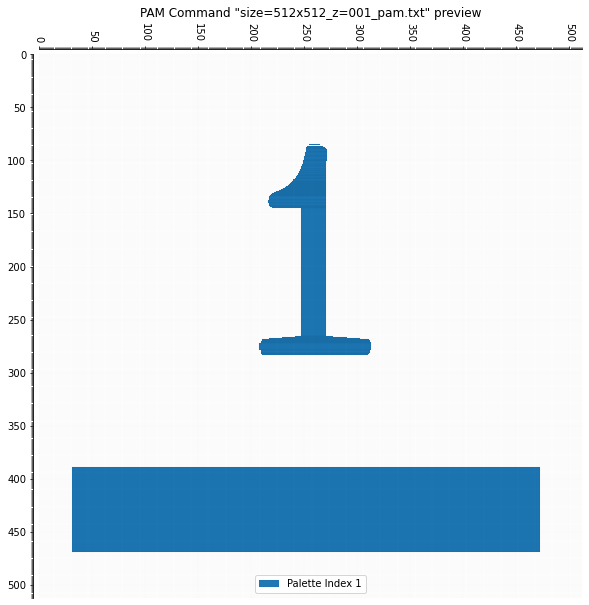

Auto-assigned chunk labels to be chunk values, and mapped labels to integer ids.

> Generating ChunkList command string.
data\examples\test_3d_v2.tif_mask_outputs\size=512x512_z=002_pam.txt

Attempting to preview command file "data\examples\test_3d_v2.tif_mask_outputs\size=512x512_z=002_pam.txt"
Chunk     66 : (array([[213.01248, 142.00832],
       [217.98912, 142.00832],
       [217.98912, 142.99136],
       [213.01248, 142.99136]]), 1)
Chunk    132 : (array([[239.01184, 221.00992],
       [261.9904 , 221.00992],
       [261.9904 , 221.98784],
       [239.01184, 221.98784]]), 1)
Chunk    198 : (array([[ 31.01184, 389.01248],
       [382.99136, 389.01248],
       [382.99136, 468.992  ],
       [ 31.01184, 468.992  ]]), 1)
Creating Figure
Saving Figure
Displaying preview figure in notebook output:


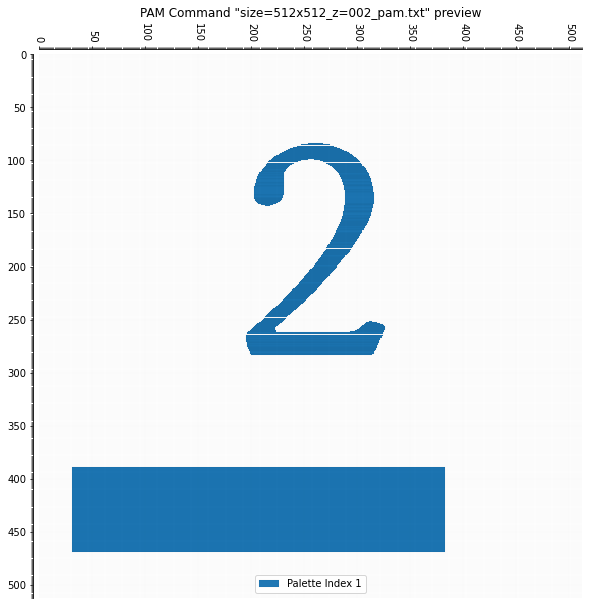

Auto-assigned chunk labels to be chunk values, and mapped labels to integer ids.

> Generating ChunkList command string.
data\examples\test_3d_v2.tif_mask_outputs\size=512x512_z=003_pam.txt

Attempting to preview command file "data\examples\test_3d_v2.tif_mask_outputs\size=512x512_z=003_pam.txt"
Chunk     61 : (array([[211.01056, 131.01056],
       [221.98784, 131.01056],
       [221.98784, 131.98848],
       [211.01056, 131.98848]]), 1)
Chunk    122 : (array([[291.01056, 217.0112 ],
       [317.98784, 217.0112 ],
       [317.98784, 218.98752],
       [291.01056, 218.98752]]), 1)
Creating Figure
Saving Figure
Displaying preview figure in notebook output:


In [ ]:
file_name = 'test_3d_v2.tif'
file_path = os.path.join(data_dir, file_name)
mask = masks.Mask.from_image(file_path)
mask.write_command_files()

## To Be Continued ...
There are many, many other settings which can currently be explored in the source code.